In [1]:
from billiard import *

In [2]:
QC = Billiard(shape='quartercircle', a1=1, a2=1, M0=400, V0=5e4)
QC.compute_everything()

V-matrix Imported


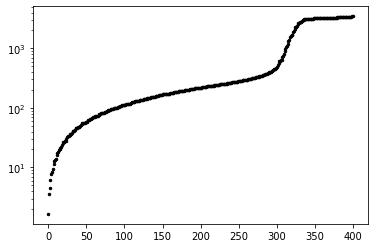

In [3]:
QC.plot_e_energies(log=True)

In [4]:
sorted(QC.kn_evals[:20])

[5.141785333480949,
 7.593502110430738,
 8.427650412939109,
 9.940952000952127,
 11.072679609248857,
 11.634880168006879,
 12.23190025600222,
 13.596513597928631,
 14.383837495415413,
 14.48347479130047,
 14.816280875113275,
 16.047519501757677,
 16.709182440490025,
 17.014110089889957,
 17.631298101555906,
 17.986219888230966,
 18.444688601966895,
 18.91135403363912,
 19.568287079319735,
 20.334902760929563]

In [5]:
def nE(Emax, E_list):
    # Returns count of entries in E_list smaller or equal to Emax
    count = 0
    for E in E_list:
        if E <= Emax:
            count += 1

    return count

def diff(E_list):
    return [(E_list[n+1] - E_list[n]) for n in range(0, len(E_list)-1)]

evals = QC.En_evals
#sorted(evals)

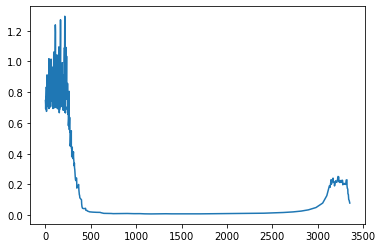

In [6]:
# want to estimate spectral density... calculate average spacing between 2 nearest neighbours on either side -> space between 5 consecutive energy levels... take this as rho

# spectral density is how many energy levels appear per unit of energy
davg = 10
rho = [(davg-1)/(evals[i+davg] - evals[i]) for i in range(len(evals)-davg) ]
plt.plot(evals[:400-davg], rho)
#nE(rho)
#plt.plot(diff([nE(rho[i],rho) for i, _ in enumerate(evals[:400-davg])]))
#diff([nE(rho[i], rho) for i, E in enumerate(evals[:100])])
#plt.plot([sum([rho[0]]) for E in evals])

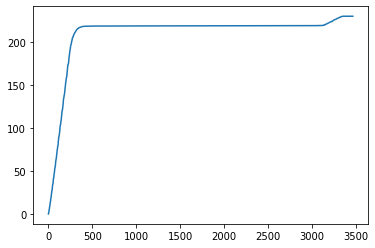

In [7]:
e_unfolded = [sum(rho[0:i]) for i, E in enumerate(evals)]
plt.plot(evals, e_unfolded)
#plt.plot(range(3500),[1/(4*np.pi)* (QC.A*E - QC.L*np.sqrt(E)) for E in range(3500)])
#plt.xlim([0,400])
#plt.ylim([0,500])

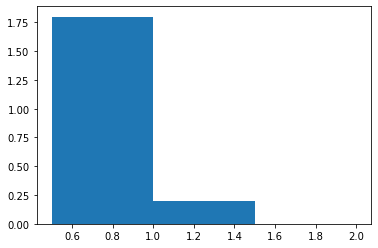

In [8]:
num_bins=15
plt.hist(np.sort(diff(e_unfolded[:200])), bins=[0.5,1, 1.5, 2], density=True)

Pgoe = lambda s: np.pi/2 * s * np.exp(-np.pi * s**2 / 4)

S = np.linspace(0, 1.5, 100)

#plt.plot(S, [Pgoe(s) for s in S])

# Circle

In [9]:
from billiard import *

In [10]:
C = Billiard(shape='circle', a1=2, a2=2, M0=400, V0=5e4)
C.compute_everything()

V-matrix Imported


In [13]:
sorted(C.En_evals[:20])

[0.36239091966673226,
 0.9190260988245589,
 0.9190665159207114,
 1.646453293051256,
 1.659216664769262,
 1.9098496344602782,
 2.548479563239131,
 2.5485651240762466,
 3.0819957588615368,
 3.0821203204281025,
 3.6078477515926712,
 3.610691019560551,
 4.423845617687966,
 4.460328979936472,
 4.6965668506794325,
 4.818546718514912,
 4.819929046773826,
 5.96743611982432,
 5.967631241634062,
 6.18685758721826]

In [12]:
#C.plot_e_energies(log=True)
#for i in range(20):
#    C.plot_wavefunction(i, 80, 80)